# Installation of Packages in Conda

After prepraring the data according to ```mimiciii_prepration/ReadMe.md```, to install the required packages in your conda environment, you can use the following commands:

```bash
conda install h5py
conda install pytables


In [ ]:
%reload_ext autoreload
%autoreload 2

In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)

from examples.mia.LOS.utils.data_processing import get_mimic_dataset, get_mimic_dataloaders
from examples.mia.LOS.utils.model import MimicLR, create_trained_model_and_metadata




In [2]:

# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), "data/")

dataset, train_indices, test_indices= get_mimic_dataset(path, train_frac = 0.5, test_frac= 0.2)

In [3]:

train_loader, test_loader= get_mimic_dataloaders(dataset, train_indices, test_indices, batch_size=128)

In [4]:
n_features = dataset.x.shape[1]
print(f"Number of features: {n_features}")

# Train the model
if not os.path.exists("target"):
    os.makedirs("target")
model = MimicLR(n_features)
train_acc, train_loss, test_acc, test_loss = create_trained_model_and_metadata(model, 
                                                                               train_loader, 
                                                                               test_loader, 
                                                                               lr = 0.0001,
                                                                               weight_decay = 0.5392, # chosing 5.392 decrease the train test gap 
                                                                               epochs=50)




Number of features: 7488


Training Progress: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it]


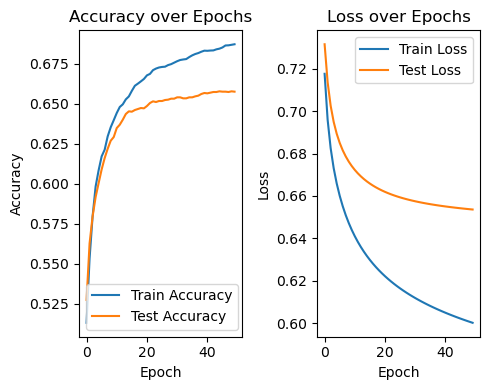

In [5]:
import matplotlib.pyplot as plt

# Plot training and test accuracy
plt.figure(figsize=(5, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot training and test loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
from mimic_handler import MimicInputHandler

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(MimicInputHandler, config_path)

# Run the audit 
leakpro.run_audit()

2024-11-22 09:25:45,391 INFO     Target model blueprint created from MimicLR in utils/model.py.
2024-11-22 09:25:45,398 INFO     Loaded target model metadata from ./target/model_metadata.pkl
2024-11-22 09:25:45,400 INFO     Loaded target model from ./target
2024-11-22 09:25:46,568 INFO     Loaded population dataset from ./data/dataset.pkl
2024-11-22 09:25:46,569 INFO     Loaded population dataset from ./data/dataset.pkl
2024-11-22 09:25:46,570 INFO     Added attack: lira
2024-11-22 09:25:46,571 INFO     Preparing attack: lira
2024-11-22 09:25:46,574 INFO     Number of existing models exceeds or equals the number of models to create
2024-11-22 09:25:46,575 INFO     Loading shadow model 0
2024-11-22 09:25:46,578 INFO     Loaded model from ./leakpro_output/attack_objects/shadow_model/shadow_model_0.pkl
2024-11-22 09:25:46,579 INFO     Loading shadow model 4
2024-11-22 09:25:46,580 INFO     Loaded model from ./leakpro_output/attack_objects/shadow_model/shadow_model_4.pkl
2024-11-22 09:25:4

No existing file named './leakpro_output/results/lira/results.txt'. A new file will be created.


2024-11-22 09:25:59,687 INFO     Auditing completed


<Figure size 640x480 with 0 Axes>